In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load datasets
customers = pd.read_csv('C:\\Users\\hp\\Downloads\\Customers.csv')
products = pd.read_csv('C:\\Users\\hp\\Downloads\\Products.csv')
transactions = pd.read_csv('C:\\Users\\hp\\Downloads\\Transactions.csv')

In [8]:
# Exploratory Data Analysis (EDA)
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [9]:
# Missing values check
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [10]:
# Merging datasets
df = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


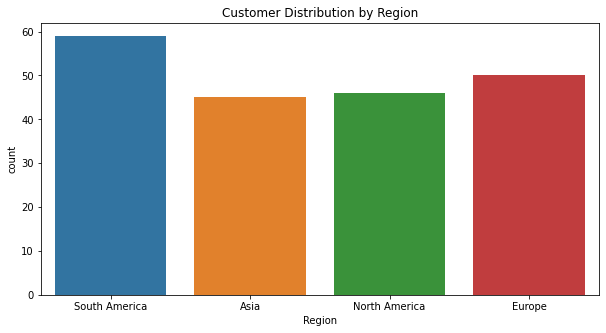

In [11]:
# EDA visualizations
plt.figure(figsize=(10,5))
sns.countplot(x='Region', data=customers)
plt.title('Customer Distribution by Region')
plt.show()

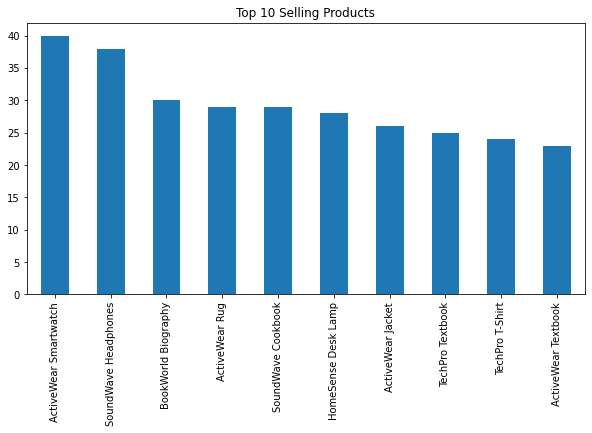

In [12]:
plt.figure(figsize=(10,5))
top_products = df['ProductName'].value_counts().head(10)
top_products.plot(kind='bar')
plt.title('Top 10 Selling Products')
plt.show()

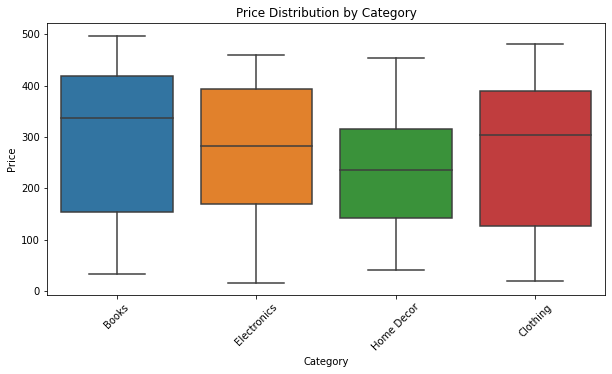

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Category', y='Price', data=products)
plt.title('Price Distribution by Category')
plt.xticks(rotation=45)
plt.show()

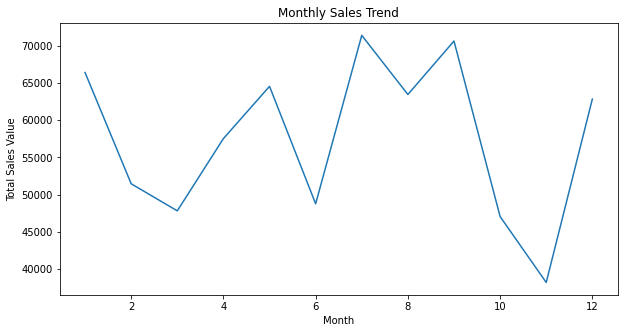

In [14]:
plt.figure(figsize=(10,5))
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Month'] = df['TransactionDate'].dt.month
df.groupby('Month')['TotalValue'].sum().plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.show()

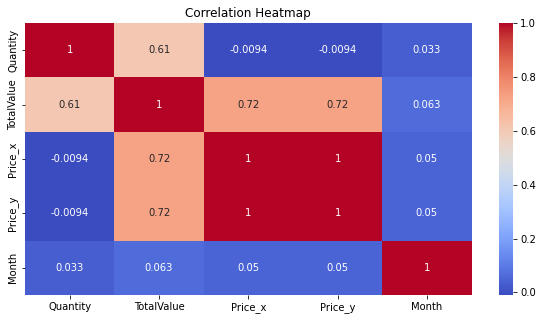

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()